In [1]:
import pandas as pd
import glob
import os
import numpy as np
import re
from turfpy.measurement import boolean_point_in_polygon
from geojson import Point, Polygon, Feature
import dask.dataframe as dd
import dask.multiprocessing
import copy
import time
from dask.distributed import Client
from dask import delayed
import matplotlib.pyplot as plt
import xlsxwriter
import matplotlib as mpl
mpl.rcParams["agg.path.chunksize"]=2000000

In [2]:
coords = [[(22.30879,-84.53096),  (21.38244,-87.13557),  (19.99724,-87.79592),  (19.08209,-87.73058),  (18.57891,-87.92891),  (18.93717,-88.26083),  (18.53013,-88.55112),  (17.94324,-88.12096),  (16.51103,-88.60098),  (15.76194,-89.18749),  (15.63544,-87.35024),  (15.91115,-85.01607),  (15.7259,-84.64079),  (15.0318,-83.4635),  (14.36176,-83.50395),  (12.71584,-83.71669),  (11.70429,-83.85652),  (10.94579,-83.89448),  (9.33636,-82.58612),  (8.78624,-81.77151),  (8.77857,-80.98986),  (9.26237,-79.97588),  (9.54577,-79.49716),  (9.439,-79.17226),  (9.29043,-78.43455),  (8.8271,-77.77375),  (8.58435,-77.44335),  (7.85391,-76.73433),  (8.79772,-76.33292),  (9.58412,-75.48389),  (10.50916,-75.40389),  (10.9951,-74.78248),  (10.70425,-74.35265),  (11.20138,-74.02032),  (11.00924,-73.44356),  (12.36861,-71.5869),  (12.07562,-71.32331),  (11.35944,-72.11447),  (10.46245,-71.78518),  (9.89689,-72.26918),  (9.26204,-71.96276),  (8.98431,-71.64535),  (9.03202,-71.19611),  (9.54797,-70.84933),  (10.57749,-71.36428),  (10.91398,-71.31892),  (11.07763,-70.94397),  (11.36533,-69.83968),  (11.44498,-69.31202),  (11.10873,-68.42149),  (10.4891,-68.25542),  (10.46929,-67.53875),  (10.53658,-66.80409),  (10.51205,-66.22324),  (10.09544,-65.81959),  (10.04045,-64.60579),  (10.4453,-64.17085),  (10.45554,-63.69196),  (10.58353,-63.68872),  (10.69527,-62.83954),  (10.66612,-62.24466),  (10.59377,-62.30896),  (10.52463,-62.82208),  (10.24681,-62.76871),  (9.87676,-62.33357),  (9.94654,-62.19732),  (9.9081,-62.05009),  (9.74459,-61.70068),  (10.17584,-61.05481),  (10.63159,-61.08894),  (10.8224,-60.95277),  (11.21825,-60.51798),  (12.888,-59.53852),  (13.19626,-59.333),  (13.33316,-59.46806),  (15.02249,-60.86977),  (17.6705,-61.60777),  (18.21835,-62.86403),  (18.576,-64.48925),  (18.31867,-65.70798),  (18.01193,-65.90422),  (18.0248,-67.1097),  (18.46786,-67.12564),  (18.58169,-68.27812),  (18.35092,-68.64949),  (18.59796,-69.78774),  (18.34179,-70.28446),  (18.60056,-70.97027),  (17.78298,-71.441),  (18.21484,-71.98697),  (18.2499,-72.49455),  (18.24322,-73.00212),  (18.37588,-74.34686),  (18.58884,-74.28975),  (18.3896,-72.94507),  (18.57459,-72.21127),  (19.04785,-72.72121),  (19.51466,-72.66443),  (19.76333,-73.42979),  (20.19763,-74.23539),  (20.05453,-75.51701),  (19.93326,-77.59686),  (20.55696,-77.01046),  (20.6908,-77.24391),  (21.06069,-78.30407),  (21.65482,-78.71053),  (21.63578,-79.36964),  (22.69665,-81.52281),  (22.76293,-82.68706),  (22.33212,-83.44481)]]
polygon = Polygon(coords)


In [3]:
files = glob.glob(r"C:\Users\Christian Forero\Desktop\AIS\Nueva carpeta2\export-*.csv")
#

In [4]:

print(" Digite los valores correspondistes al año, mes, día y hora de interés. Para el año son validos los valores en el formato AAAA. Para los meses y días se permite los numeros entre 1-12 y 1-31,respectivamente. Mientras que, para las horas los valores entre 1-24")

AI=int(input("digite el año inicial: "))
AF=int(input("digite el año final: "))
MI=int(input("digite el mes inicial: "))
MF=int(input("digite el mes final: "))
DI=int(input("digite el día inicial: "))
DF=int(input("digite el día final: "))
HI=int(input("digite el hora inicial: "))
HF=int(input("digite el hora final: "))
QUERY_MMSI=int(input("Si desea buscar embarcaciones digite 1 , de lo contrario digite 0: "))
mmsi_list= list()

while QUERY_MMSI==1:
    MMSI=int(input("Digite el mmsi de la embarcación: "))
    mmsi_list.append(MMSI)
    QUERY_MMSI=int(input("Si desea buscar embarcaciones digite 1 , de lo contrario digite 0: "))
    
    
    
print(mmsi_list)


 Digite los valores correspondistes al año, mes, día y hora de interés. Para el año son validos los valores en el formato AAAA. Para los meses y días se permite los numeros entre 1-12 y 1-31,respectivamente. Mientras que, para las horas los valores entre 1-24
digite el año inicial: 2016
digite el año final: 2017
digite el mes inicial: 1
digite el mes final: 12
digite el día inicial: 1
digite el día final: 31
digite el hora inicial: 1
digite el hora final: 24
Si desea buscar embarcaciones digite 1 , de lo contrario digite 0: 1
Digite el mmsi de la embarcación: 111111000
Si desea buscar embarcaciones digite 1 , de lo contrario digite 0: 0
[111111000]


In [5]:
%%time

base = []
for f in files:
    df = dd.read_csv(f, usecols=("timestamp", "mmsi", "latitude", "longitude", "ship_and_cargo_type"),
                     encoding='cp1252')
    
    df['timestamp'] = df['timestamp'].map(lambda x: str(x)[:-3])
    df['timestamp'] = dd.to_datetime(df.timestamp, format='%Y-%m-%d %H:%M:%S')# le cambié Fecha..pa no repetirla
    df['Day'] = df['timestamp'].dt.day
    df['Month'] = df['timestamp'].dt.month
    df['Year'] = df['timestamp'].dt.year
    df['Hour'] = df['timestamp'].dt.hour
    
    
    
    df=df[df['Year']>=AI]
    df=df[df['Year']<=AF]
    df=df[df['Month']>=MI]
    df=df[df['Month']<=MF]
    df=df[df['Day']>=DI]
    df=df[df['Day']<=DF]
    df=df[df['Hour']>=HI]
    df=df[df['Hour']<=HF]

    if len(mmsi_list)>0:
        df=df[df['mmsi'].isin(mmsi_list)]
    
        
    
    
    
    df = df.persist()
    
    base.append(df) 
    

Wall time: 2.01 s


In [6]:
dataframe_final=dd.concat(base,axis=0,interleave_partitions=True)
df_= dataframe_final.persist()
df_final=df_.copy()
df_final.compute()

,timestamp,mmsi,latitude,longitude,ship_and_cargo_type,Day,Month,Year,Hour
3211,2016-08-27 09:53:00,111111000,10.82798,-62.303862,NaN,27,8,2016,9
631,2016-10-08 04:57:00,111111000,10.252733,-64.597573,NaN,8,10,2016,4
922,2016-09-09 06:06:00,111111000,10.460597,-64.193012,NaN,9,9,2016,6
1683,2016-10-04 05:40:00,111111000,10.252742,-64.59755,NaN,4,10,2016,5
1839,2016-10-27 09:41:00,111111000,10.252913,-64.59766,NaN,27,10,2016,9
2088,2016-10-31 07:13:00,111111000,10.252872,-64.597662,NaN,31,10,2016,7
2202,2016-10-22 21:53:00,111111000,10.252882,-64.597752,NaN,22,10,2016,21
2326,2016-10-08 02:22:00,111111000,10.252695,-64.597595,NaN,8,10,2016,2
1283,2016-08-27 09:43:00,111111000,10.827383,-62.27234,NaN,27,8,2016,9
1493,2016-09-27 08:48:00,111111000,10.25271,-64.597532,NaN,27,9,2016,8


In [7]:
df_final_df=df_final.sort_values(by=['mmsi']).compute()
df_final_df=df_final_df.sort_values(by=['mmsi','timestamp'])
df_final_df

,timestamp,mmsi,latitude,longitude,ship_and_cargo_type,Day,Month,Year,Hour
1283,2016-08-27 09:43:00,111111000,10.827383,-62.27234,NaN,27,8,2016,9
3211,2016-08-27 09:53:00,111111000,10.82798,-62.303862,NaN,27,8,2016,9
1805,2016-08-31 19:22:00,111111000,10.460602,-64.19297,NaN,31,8,2016,19
1141,2016-09-04 06:46:00,111111000,10.460537,-64.193087,NaN,4,9,2016,6
2290,2016-09-06 06:10:00,111111000,10.460597,-64.19301,NaN,6,9,2016,6
922,2016-09-09 06:06:00,111111000,10.460597,-64.193012,NaN,9,9,2016,6
1348,2016-09-13 14:28:00,111111000,10.992322,-63.797993,NaN,13,9,2016,14
1629,2016-09-15 02:40:00,111111000,10.992183,-63.798587,NaN,15,9,2016,2
1493,2016-09-27 08:48:00,111111000,10.25271,-64.597532,NaN,27,9,2016,8
485,2016-09-28 20:42:00,111111000,10.252612,-64.597605,NaN,28,9,2016,20


In [8]:
df_final_df["Estado"]="0"

In [9]:
import numpy as np

In [10]:
for i in range(len(df_final_df)-1):
    if df_final_df.iloc[i].mmsi==df_final_df.iloc[i+1].mmsi:
        df_final_df.at[df_final_df.index[i], 'Estado'] = np.sqrt((df_final_df.iloc[i].latitude-df_final_df.iloc[i-1].latitude)**2+(df_final_df.iloc[i].longitude-df_final_df.iloc[i-1].longitude)**2)
        if (df_final_df.at[df_final_df.index[i], 'Estado']>=1).any():
            df_final_df.at[df_final_df.index[i], 'Estado']="En movimiento"
        else:
            df_final_df.at[df_final_df.index[i], 'Estado']="Detenido"
    else:
            df_final_df.at[df_final_df.index[i], 'Estado']="Detenido"
    

In [11]:
df_final_df

,timestamp,mmsi,latitude,longitude,ship_and_cargo_type,Day,Month,Year,Hour,Estado
1283,2016-08-27 09:43:00,111111000,10.827383,-62.27234,NaN,27,8,2016,9,En movimiento
3211,2016-08-27 09:53:00,111111000,10.82798,-62.303862,NaN,27,8,2016,9,Detenido
1805,2016-08-31 19:22:00,111111000,10.460602,-64.19297,NaN,31,8,2016,19,En movimiento
1141,2016-09-04 06:46:00,111111000,10.460537,-64.193087,NaN,4,9,2016,6,Detenido
2290,2016-09-06 06:10:00,111111000,10.460597,-64.19301,NaN,6,9,2016,6,Detenido
922,2016-09-09 06:06:00,111111000,10.460597,-64.193012,NaN,9,9,2016,6,Detenido
1348,2016-09-13 14:28:00,111111000,10.992322,-63.797993,NaN,13,9,2016,14,Detenido
1629,2016-09-15 02:40:00,111111000,10.992183,-63.798587,NaN,15,9,2016,2,Detenido
1493,2016-09-27 08:48:00,111111000,10.25271,-64.597532,NaN,27,9,2016,8,En movimiento
485,2016-09-28 20:42:00,111111000,10.252612,-64.597605,NaN,28,9,2016,20,Detenido


In [12]:
df_final_df["Estado"]

1283    En movimiento
3211         Detenido
1805    En movimiento
1141         Detenido
2290         Detenido
922          Detenido
1348         Detenido
1629         Detenido
1493    En movimiento
485          Detenido
1929         Detenido
1683         Detenido
2026         Detenido
2326         Detenido
387          Detenido
631          Detenido
332          Detenido
2202         Detenido
200          Detenido
1839         Detenido
202          Detenido
2088         Detenido
1034                0
Name: Estado, dtype: object

In [13]:
df_final['mmsi'].value_counts().compute()

111111000    23
Name: mmsi, dtype: int64

In [14]:
df_final['mmsi']=df_final['mmsi'].astype("category")

In [15]:
df_final=df_final.compute()

In [16]:
df_final = df_final.sort_values(by="timestamp")

In [17]:

x = df_['longitude'].compute()
y = df_['latitude'].compute()
z = df_['mmsi'].compute()

df8=df_
df8['latitude']=df8['latitude'].astype(int)
df8['longitude']=df8['longitude'].astype(int)


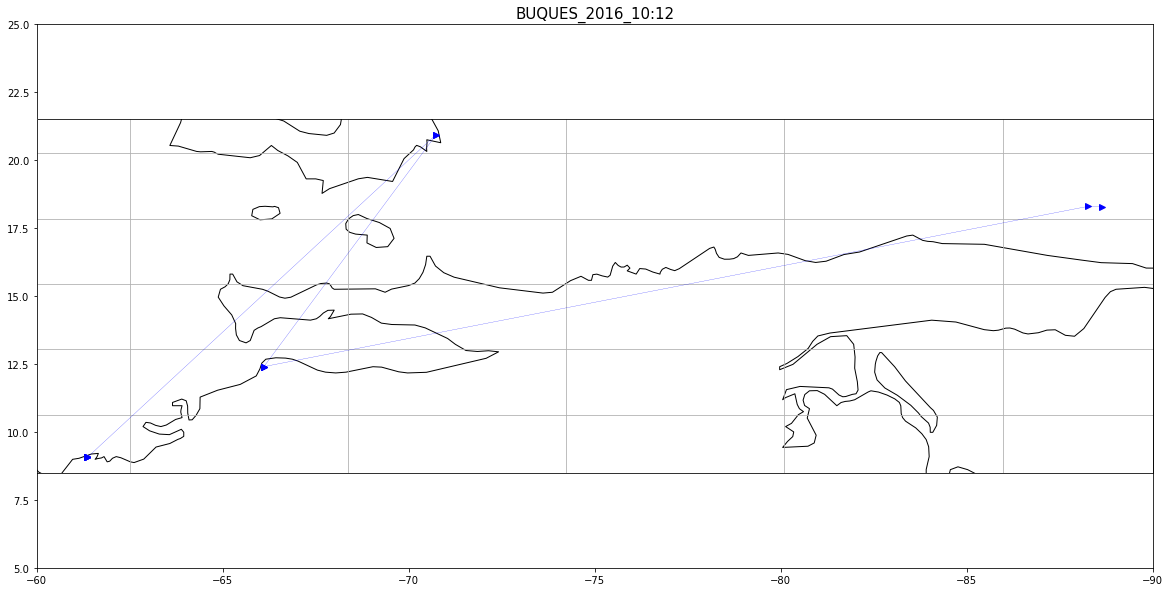

In [19]:
#Usar solo si se han seleccionado 8 barcos o menos
import cartopy.crs as ccrs
import cartopy.feature as cfeature
colores=['b','g','r','c','m','y','k','w']

fig = plt.figure(figsize=(20,10))
plt.xlim(-60,-90)
plt.ylim(5,25)
plt.title('BUQUES_2016_10:12',fontsize=15, color="black")
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())
i=0
for key, grp in df_final.groupby(['mmsi']):
    grp = grp.sort_values(by="timestamp")
    ax.plot(grp['longitude'], grp['latitude'], '{}>-'.format(colores[i]),linewidth=0.2, markersize=6,label=key)
    i=i+1
    #print(grp)
ax.coastlines()
ax.gridlines()
#ax.add_feature(cfeature.OCEAN)

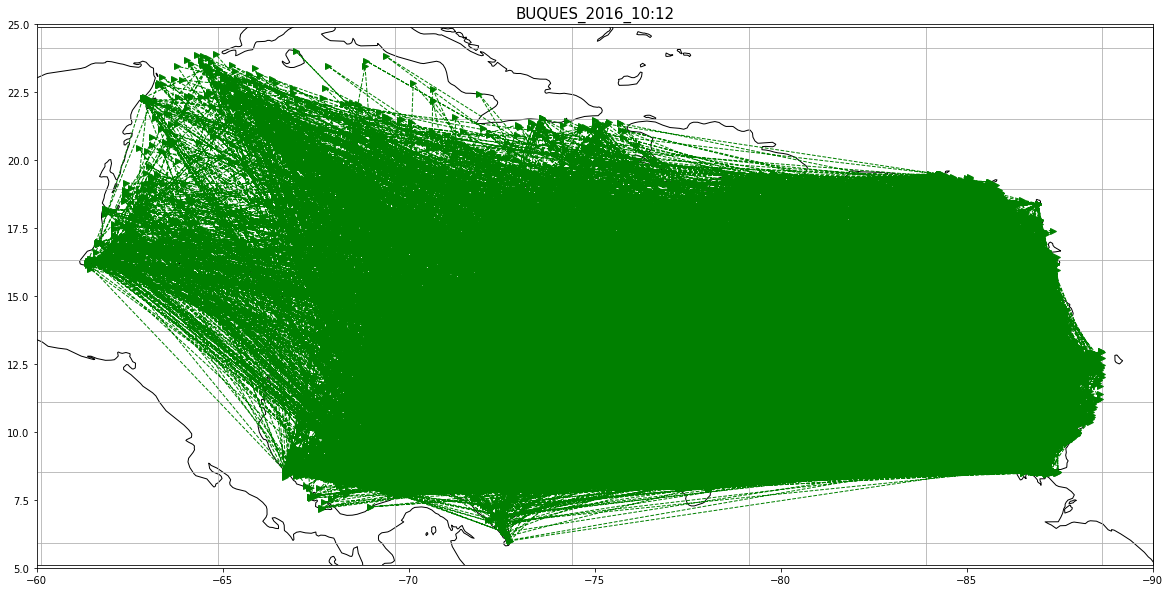

In [63]:
# Usar para más de 8 barcos
import cartopy.crs as ccrs
import cartopy.feature as cfeature


fig = plt.figure(figsize=(20,10))
plt.xlim(-60,-90)
plt.ylim(5,25)
plt.title('BUQUES_2016_10:12',fontsize=15, color="black")
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())
ax.plot(df_final['longitude'], df_final['latitude'], 'g>--',linewidth=1, markersize=6, label=df_final['mmsi'])

ax.coastlines()
ax.gridlines()


digite el número 1 si desea una grilla de 1x1 grados o digite el número 2 si desea una grilla de 2x2 grados2


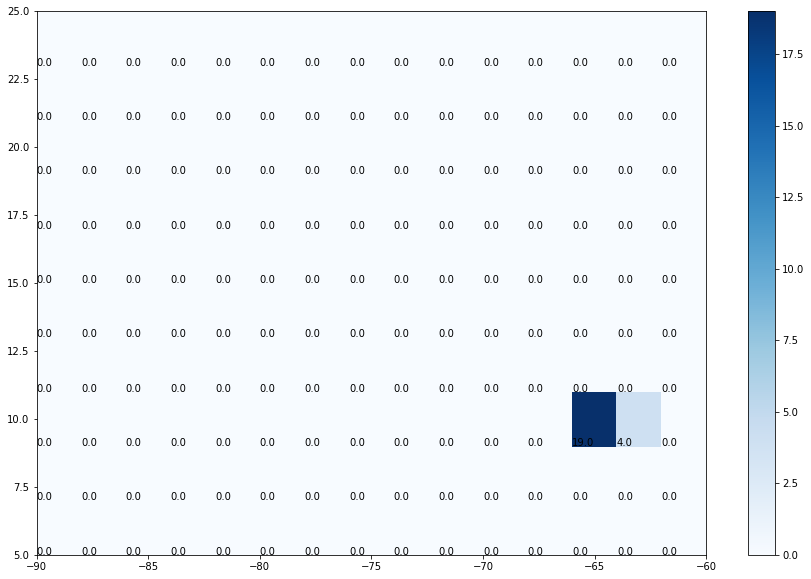

In [20]:

op=int(input("digite el número 1 si desea una grilla de 1x1 grados o digite el número 2 si desea una grilla de 2x2 grados"))

grilla = pd.DataFrame(columns=['longitud','latitud','mmsi_totales','mmsi_unicos','ship_cargo_total','ship_cargo_unico'])

if op==1:
    fig = plt.figure(figsize=(30,20))

    counts, xedges, yedges, Image = plt.hist2d(x, y,(30, 20), # De 90 a 60= 30 y de 5 a 25 = 20, en y queda en un grado
                                               range=np.array([(-90, -60), (5, 25)]), 
                                               cmap="OrRd") # normed= False solo conteos, normed=True frecuencia relativa
    plt.colorbar(Image)
    dx = xedges[2]-xedges[1]
    dy = yedges[2]-yedges[1]

    for i in range(xedges.size-1):
        for j in range(yedges.size-1):
            xb = xedges[i] + 0.25*dx
            yb = yedges[j] + 0.25*dy 
            df9 = df8[df8['longitude']==int(str(xb)[0:3])]
            df9 = df9[df9['latitude']==int(str(int(yb))[0:3])]
            ship_cargo_unico=df9.ship_and_cargo_type.nunique().compute()
            mmsi_total=df9.shape[0].compute()
            mmsi_unico=df9.mmsi.nunique().compute()
            ship_cargo_total=mmsi_total-df9.ship_and_cargo_type.isna().sum().compute()

            grilla = grilla.append({'longitud': int(str(xb)[0:3]),'latitud':int(str(int(yb))[0:2]),'mmsi_totales': mmsi_total,'mmsi_unicos':mmsi_unico,'ship_cargo_total':ship_cargo_total,'ship_cargo_unico':ship_cargo_unico}, ignore_index=True)
            plt.text(xb, yb, str(np.round(1.*counts[i,j],0)), fontsize=10)

if op==2:
    fig = plt.figure(figsize=(15,10))
    

    counts, xedges, yedges, Image = plt.hist2d(x, y,(15, 10), # De 90 a 60= 30 y de 5 a 25 = 20, en y queda en un grado
                                               range=np.array([(-90, -60), (5, 25)]), 
                                               cmap="Blues") # normed= False solo conteos, normed=True frecuencia relativa
    plt.colorbar(Image)
    dx = xedges[2]-xedges[1]
    dy = yedges[2]-yedges[1]

    for i in range(xedges.size-1):
        for j in range(yedges.size-1):
            xb = xedges[i] 
            yb = yedges[j] 
            df9 = df8[(df8['longitude']==int(str(xb+1)[0:3]))|(df8['longitude']==int(str(xb)[0:3]))]
            df9 = df9[(df9['latitude']==int(str(int(yb+1))[0:3]))|(df9['latitude']==int(str(int(yb))[0:3]))]
            ship_cargo_unico=df9.ship_and_cargo_type.nunique().compute()
            mmsi_total=df9.shape[0].compute()
            mmsi_unico=df9.mmsi.nunique().compute()
            ship_cargo_total=mmsi_total-df9.ship_and_cargo_type.isna().sum().compute()

            grilla = grilla.append({'longitud': int(str(xb)[0:3]),'latitud':int(str(int(yb))[0:2]),'mmsi_totales':np.round(1.*counts[i,j],0),'mmsi_unicos':mmsi_unico,'ship_cargo_total':ship_cargo_total,'ship_cargo_unico':ship_cargo_unico}, ignore_index=True)
            plt.text(xb, yb, str(np.round(1.*counts[i,j],0)))
            
                

        
#QUEDO UNA GRILLA DE DOS GRADOS

plt.show()

In [ ]:
grilla.to_csv(r"C:\Users\Juan C Ospina\Documents\PYTHON_Cristian\Crist_10\Resultado\buque2017.csv", index=False)


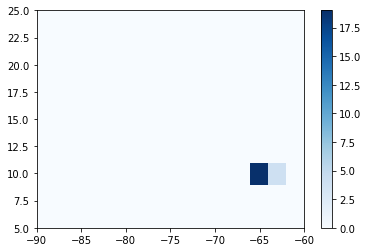

In [21]:
counts, xedges, yedges, Image = plt.hist2d(x, y,(15, 10), # De 90 a 60= 30 y de 5 a 25 = 20, en y queda en un grado
                                               range=np.array([(-90, -60), (5, 25)]), 
                                               cmap="Blues") # normed= False solo conteos, normed=True frecuencia relativa
plt.colorbar(Image)

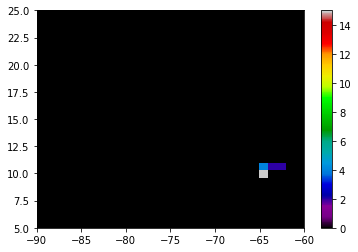

In [22]:
counts, xedges, yedges, Image = plt.hist2d(x, y, # De 90 a 60= 30 y de 5 a 25 = 20, en y queda en un grado
                                               range=np.array([(-90, -60), (5, 25)]),bins=(30, 30), cmap=plt.cm.nipy_spectral) # normed= False solo conteos, normed=True frecuencia relativa
plt.colorbar(Image)


In [24]:
from arcgis.gis import GIS
gis = GIS()


In [36]:
mymap = gis.map()


In [37]:
mymap


MapView(layout=Layout(height='400px', width='100%'))

In [27]:
df_final_df_2 = df_final_df[['latitude', 'longitude','mmsi','timestamp','Estado']]


In [28]:
df_final_df_2

,latitude,longitude,mmsi,timestamp,Estado
1283,10.827383,-62.27234,111111000,2016-08-27 09:43:00,En movimiento
3211,10.82798,-62.303862,111111000,2016-08-27 09:53:00,Detenido
1805,10.460602,-64.19297,111111000,2016-08-31 19:22:00,En movimiento
1141,10.460537,-64.193087,111111000,2016-09-04 06:46:00,Detenido
2290,10.460597,-64.19301,111111000,2016-09-06 06:10:00,Detenido
922,10.460597,-64.193012,111111000,2016-09-09 06:06:00,Detenido
1348,10.992322,-63.797993,111111000,2016-09-13 14:28:00,Detenido
1629,10.992183,-63.798587,111111000,2016-09-15 02:40:00,Detenido
1493,10.25271,-64.597532,111111000,2016-09-27 08:48:00,En movimiento
485,10.252612,-64.597605,111111000,2016-09-28 20:42:00,Detenido


In [89]:
# import pandas as pd
# df = pd.read_csv(r'prueba_interface_vesel.txt', sep=";", header=None)
# df.columns = ['y', 'x', 'mmsi', 'zeit','Estado']

In [29]:
df_final_df_2.columns = ['y', 'x', 'mmsi', 'zeit','Estado']

In [30]:
df_final_df_2

,y,x,mmsi,zeit,Estado
1283,10.827383,-62.27234,111111000,2016-08-27 09:43:00,En movimiento
3211,10.82798,-62.303862,111111000,2016-08-27 09:53:00,Detenido
1805,10.460602,-64.19297,111111000,2016-08-31 19:22:00,En movimiento
1141,10.460537,-64.193087,111111000,2016-09-04 06:46:00,Detenido
2290,10.460597,-64.19301,111111000,2016-09-06 06:10:00,Detenido
922,10.460597,-64.193012,111111000,2016-09-09 06:06:00,Detenido
1348,10.992322,-63.797993,111111000,2016-09-13 14:28:00,Detenido
1629,10.992183,-63.798587,111111000,2016-09-15 02:40:00,Detenido
1493,10.25271,-64.597532,111111000,2016-09-27 08:48:00,En movimiento
485,10.252612,-64.597605,111111000,2016-09-28 20:42:00,Detenido


In [31]:
ships = gis.content.import_data(df_final_df_2)

In [32]:
mymap.add_layer(ships)

In [33]:
mymap.center = [59, -2]

In [35]:
mymap

MapView(layout=Layout(height='400px', width='100%'))